In [2]:
import pandas as pd
import requests
import datetime
import time
import json
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# summarize all escrow addresses investigated for the different projects 

In [27]:
arbitrum = pd.read_csv('data/arbitrum_escrows_final.csv')
arbitrum['date'] = pd.to_datetime(arbitrum['date'])
arbitrum['escrow_address_abbr'] = arbitrum['escrow_address'].str[:8] + '...' + arbitrum['escrow_address'].str[-4:]
arbitrum['project'] = 'arbitrum'

dydx = pd.read_csv('data/dydx_escrows_final.csv')
dydx['date'] = pd.to_datetime(dydx['date'])
dydx['escrow_address_abbr'] = dydx['escrow_address'].str[:8] + '...' + dydx['escrow_address'].str[-4:]
dydx['project'] = 'dydx'


optimism = pd.read_csv('data/optimism_escrows_final.csv')
optimism['date'] = pd.to_datetime(optimism['date'])
optimism['escrow_address_abbr'] = optimism['escrow_address'].str[:8] + '...' + optimism['escrow_address'].str[-4:]
optimism['project'] = 'optimism'


zksync = pd.read_csv('data/zksync_escrows_final.csv')
zksync['date'] = pd.to_datetime(zksync['date'])
zksync['escrow_address_abbr'] = zksync['escrow_address'].str[:8] + '...' + zksync['escrow_address'].str[-4:]
zksync['project'] = 'zksync'


In [28]:
price_data = pd.read_csv('utils/price-data/price_data.csv') 
price_data['timestamp'] = pd.to_datetime(price_data['timestamp'])
price_data['token_address'] = price_data['token_address'].apply(str)

In [29]:
# Concatenate the DataFrames vertically
all_projects_combined = pd.concat([arbitrum, dydx, optimism, zksync], ignore_index=True)

# Print the shape of the combined DataFrame
print(all_projects_combined.shape)

(92959, 15)


In [30]:
all_projects_combined
all_projects_combined['date'] = pd.to_datetime(all_projects_combined['date'])

In [31]:
# Convert 'timestamp' columns to datetime64[ns] type
all_projects_combined['timestamp'] = pd.to_datetime(all_projects_combined['timestamp'])
price_data['timestamp'] = pd.to_datetime(price_data['timestamp'])

# Filter price_data for 'ether'
filtered_price_data = price_data[price_data['token_address'] == 'ether']

# Rename the 'price' column to 'price_eth'
filtered_price_data = filtered_price_data.rename(columns={'price': 'price_eth'})


all_projects_combined = pd.merge(all_projects_combined, filtered_price_data, left_on='timestamp', right_on='timestamp', how='left')

# Drop the extra 'token_address_y' column
all_projects_combined.drop(columns=['token_address_y'], inplace=True)

# Rename the original 'token_address_x' to 'token_address'
all_projects_combined.rename(columns={'token_address_x': 'token_address'}, inplace=True)

# Calculate balance_eth
all_projects_combined['balance_eth'] = all_projects_combined['balance_usd'] / all_projects_combined['price_eth']


In [12]:
# Convert the 'date' column to datetime if it's not already
all_projects_combined['date'] = pd.to_datetime(all_projects_combined['date'])

# Filter the DataFrame to include only rows from the last day
last_day_data = all_projects_combined[all_projects_combined['date'] == all_projects_combined['date'].max()]

# Group by the 'project' column and calculate the sum of 'balance_usd' and 'balance_eth'
project_balances = last_day_data.groupby(['project', 'date'])[['balance_usd', 'balance']].sum()

# Set the display format for float numbers
pd.options.display.float_format = '{:.2f}'.format

# Print the resulting DataFrame
print(project_balances)


                      balance_usd       balance
project  date                                  
arbitrum 2023-04-29 4708399721.82 5203220857.80
dydx     2023-04-29  336683351.71  336642520.50
optimism 2023-04-29 1452523314.25  676241996.84
zksync   2023-04-29  261827949.05  108610028.43


In [13]:
# Convert the 'date' column to datetime if it's not already
all_projects_combined['date'] = pd.to_datetime(all_projects_combined['date'])

# Filter the DataFrame to include only rows from the last day
last_day_data = all_projects_combined[all_projects_combined['date'] == all_projects_combined['date'].max()]

# Group by the 'project' column and calculate the sum of 'balance_usd' and 'balance_eth'
project_balances = last_day_data.groupby(['escrow_address', 'date','escrow_address_rdbl'])[['balance_usd', 'balance', 'balance_eth']].sum()

# Set the display format for float numbers
pd.options.display.float_format = '{:.2f}'.format

# Print the resulting DataFrame
project_balances


,,,balance_usd,balance,balance_eth
escrow_address,date,escrow_address_rdbl,,,
0x011B6E24FfB0B5f5fCc564cf4183C5BBBc96D515,2023-04-29,L1OldBridge,0.00,0.00,0.00
0x045e507925d2e05D114534D0810a1abD94aca8d6,2023-04-29,L1SnxOldBridge,0.00,0.00,0.00
0x32400084C286CF3E17e7B677ea9583e60a000324,2023-04-29,ZkSyncEthEscrow,154385893.16,81007.70,81007.70
0x467194771dAe2967Aef3ECbEDD3Bf9a310C76C65,2023-04-29,L1DaiGateway,66487816.39,66476398.44,34886.77
0x57891966931Eb4Bb6FB81430E6cE0A03AAbDe063,2023-04-29,ZkSyncErc20Escrow,107442055.89,108529020.73,56375.84
0x5Fd79D46EBA7F351fe49BFF9E87cdeA6c821eF9f,2023-04-29,L1SnxCurrentdBridge,239312282.26,96846592.89,125569.36
0x8315177aB297bA92A06054cE80a67Ed4DBd7ed3a,2023-04-29,L1Bridge,2053739710.84,1077616.16,1077616.16
0x99C9fc46f92E8a1c0deC1b1747d010903E884bE1,2023-04-29,L1StandardBridge,1146723215.60,512919005.51,601696.24
0xA10c7CE4b876998858b1a9E12b10092229539400,2023-04-29,L1DaiGateway,158448418.09,158421207.76,83139.35


In [14]:
# Convert the 'date' column to datetime if it's not already
all_projects_combined['date'] = pd.to_datetime(all_projects_combined['date'])

# Filter the DataFrame to include only rows from the last day
last_day_data = all_projects_combined[all_projects_combined['date'] == all_projects_combined['date'].max()]

# Group by the 'project' column and calculate the sum of 'balance_usd' and 'balance_eth'
project_balances = last_day_data.groupby(['project', 'date'])[['balance_usd', 'balance', 'balance_eth']].sum()

# Set the display format for float numbers
pd.options.display.float_format = '{:.2f}'.format

# Print the resulting DataFrame
project_balances


,,balance_usd,balance,balance_eth
project,date,,,
arbitrum,2023-04-29,4708399721.82,5203220857.80,2470540.73
dydx,2023-04-29,336683351.71,336642520.50,176660.86
optimism,2023-04-29,1452523314.25,676241996.84,762152.37
zksync,2023-04-29,261827949.05,108610028.43,137383.54


In [32]:
import pandas as pd

# Assuming you have your DataFrame as 'all_projects_combined'
# Convert the 'date' column to datetime if it's not already
all_projects_combined['date'] = pd.to_datetime(all_projects_combined['date'])

# Filter the DataFrame to include only rows from the last day
last_day_data = all_projects_combined[all_projects_combined['date'] == all_projects_combined['date'].max()]

# Group by the 'escrow_address' column and calculate the sum of 'balance_usd' and 'balance_eth'
escrow_balances = last_day_data.groupby(['escrow_address', 'date'])[['balance_usd', 'balance_eth']].sum()

# Set the display format for float numbers
pd.options.display.float_format = '{:.2f}'.format

# Print the resulting DataFrame

escrow_balances


,,balance_usd,balance_eth
escrow_address,date,,
0x011B6E24FfB0B5f5fCc564cf4183C5BBBc96D515,2023-04-29,0.00,0.00
0x045e507925d2e05D114534D0810a1abD94aca8d6,2023-04-29,0.00,0.00
0x32400084C286CF3E17e7B677ea9583e60a000324,2023-04-29,154385893.16,81007.70
0x467194771dAe2967Aef3ECbEDD3Bf9a310C76C65,2023-04-29,66487816.39,34886.77
0x57891966931Eb4Bb6FB81430E6cE0A03AAbDe063,2023-04-29,107442055.89,56375.84
0x5Fd79D46EBA7F351fe49BFF9E87cdeA6c821eF9f,2023-04-29,239312282.26,125569.36
0x8315177aB297bA92A06054cE80a67Ed4DBd7ed3a,2023-04-29,2053739710.84,1077616.16
0x99C9fc46f92E8a1c0deC1b1747d010903E884bE1,2023-04-29,1146723215.60,601696.24
0xA10c7CE4b876998858b1a9E12b10092229539400,2023-04-29,158448418.09,83139.35


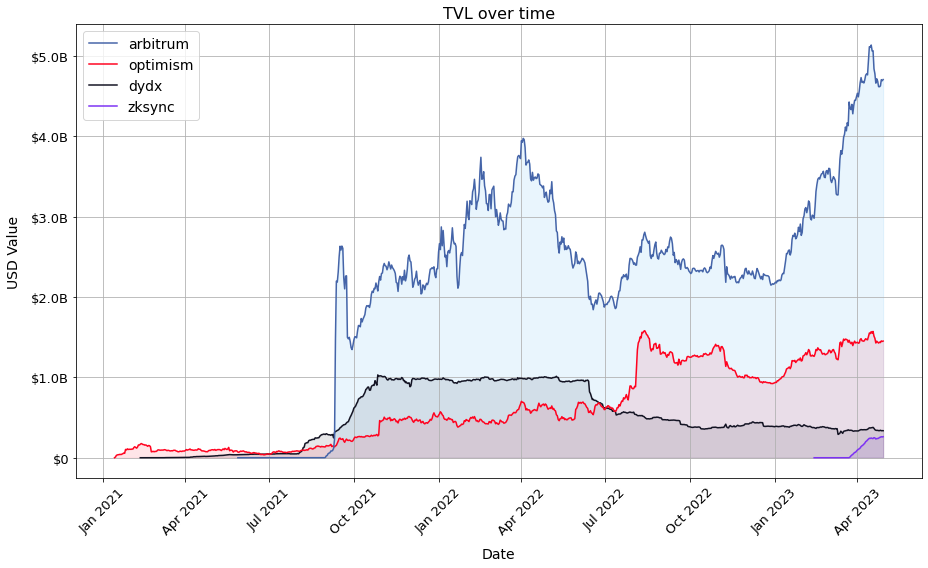

In [33]:
# Convert 'date' column to datetime type
all_projects_combined['date'] = pd.to_datetime(all_projects_combined['date'])

# Define function to format y-axis as dollar values with abbreviation
def dollar_formatter(x, pos):
    if x >= 1e9:
        return f'${x/1e9:.1f}B'
    elif x >= 1e6:
        return f'${x/1e6:.1f}M'
    elif x >= 1e3:
        return f'${x/1e3:.1f}K'
    else:
        return f'${x:.0f}'

# Define a color dictionary for your projects
color_dict = {
    'arbitrum': '#4564A8',
    'optimism': '#FF0320',
    'zksync': '#7C31F4',
    'dydx': '#131323',
}

# Group by project and date, then sum balance_usd
grouped = all_projects_combined.groupby(['project', 'date']).agg({'balance_usd': 'sum'}).reset_index()

# Plotting
plt.figure(figsize=(13, 8))
ax = plt.gca()

# Call grid here before plotting lines and fills
ax.grid(True, zorder=5)

project_order = ['zksync', 'dydx', 'optimism', 'arbitrum']

handles = []  # List to collect the legend handles
for project in project_order:
    group = grouped[grouped['project'] == project]
    line, = ax.plot(group['date'], group['balance_usd'], label=project, color=color_dict[project])
# Check for 'arbitrum' project to change the fill color
    fill_color = color_dict[project]
    fill_alpha = 0.1
    if project == 'arbitrum':
        fill_color = '#28A0F0'  # Set any desired color here
        fill_alpha = 0.1  # Adjust opacity as needed (0 for transparent, 1 for opaque)

    ax.fill_between(group['date'], 0, group['balance_usd'], color=fill_color, alpha=fill_alpha)
    handles.append(line)

# Order for the legend (for example, let's reverse it)
legend_order = ['arbitrum', 'optimism', 'dydx', 'zksync']

# Create a dictionary to map projects to their handles
handle_dict = dict(zip(project_order, handles))

# Reorder the handles according to your desired legend order
ordered_handles = [handle_dict[project] for project in legend_order]
ax.yaxis.set_major_formatter(mtick.FuncFormatter(dollar_formatter))


# Set x-axis label, format and font size
ax.set_xlabel('Date', fontsize=14, labelpad=10)
date_format = mdates.DateFormatter("%b %Y")  # This format displays first three letters of the month and year
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=13)  # setting x-ticks font size
plt.xticks(rotation=45)

# Set y-axis label, format and font size
ax.set_ylabel('USD Value', fontsize=14, labelpad=10)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(dollar_formatter))
ax.tick_params(axis='y', labelsize=13)  # setting y-ticks font size



# Display legend with custom order
plt.legend(ordered_handles, legend_order, fontsize=14)

plt.title('TVL over time', fontsize=16)

#plt.grid(True)
plt.tight_layout()

#plt.savefig('figures/tvl-all-project.png', facecolor='w',dpi=150, bbox_inches='tight')
plt.show()


### how many distinct tokens have been locked in the escrows

In [34]:
# Getting distinct values from the 'token_address' column
distinct_values = all_projects_combined['token_address'].unique()

# If you want to convert the distinct values to a list
distinct_values_list = list(distinct_values)

# If you want to convert the distinct values to a pandas Series
distinct_values_series = pd.Series(distinct_values)
distinct_values_series

0      0xB8c77482e45F1F44dE1745F52C74426C631bDD52
1      0x7D1AfA7B718fb893dB30A3aBc0Cfc608AaCfeBB0
2      0x95aD61b0a150d79219dCF64E1E6Cc01f0B64C4cE
3      0x4Fabb145d64652a948d72533023f6E7A623C7C53
4      0x1f9840a85d5aF5bf1D1762F925BDADdC4201F984
                          ...                    
98     0x3506424F91fD33084466F402d5D97f05F8e3b4AF
99     0x3a4f40631a4f906c2BaD353Ed06De7A5D3fCb430
100    0x582d872A1B094FC48F5DE31D3B73F2D9bE47def1
101    0x8A7aDc1B690E81c758F1BD0F72DFe27Ae6eC56A5
102    0xA49d7499271aE71cd8aB9Ac515e6694C755d400c
Length: 103, dtype: object

# Stacked Token Percentage of TVL

/opt/conda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:226: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/style.py:27: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


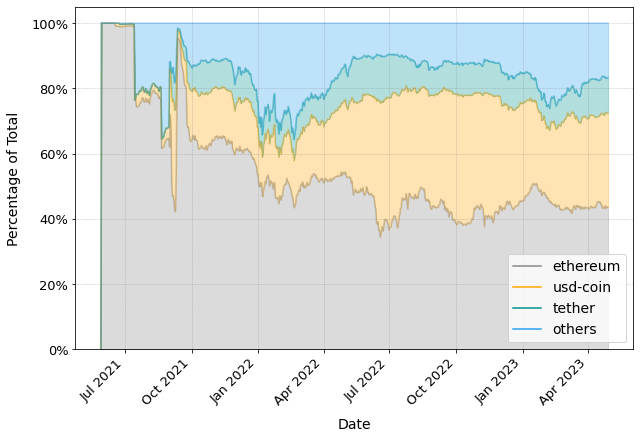

In [10]:
# Define function to format y-axis as percentages
def percent_formatter(x, pos):
    return f'{x:.0%}'

# Calculate cumulative sum of the value_usd column
balances_over_time = arbitrum.groupby(['date', 'token_name'])['balance_usd'].sum().unstack()

# Find the last date in the DataFrame
last_date = balances_over_time.index[-1]

# Sort the DataFrame by the values at the last date
sorted_balances = balances_over_time.loc[last_date].sort_values(ascending=False)

# Select the top 3 token names based on the sorting
top_3_tokens = sorted_balances.index[:3]

# Calculate the percentage contribution of each token to the total balance at each date
percentage_balances = balances_over_time.div(balances_over_time.sum(axis=1), axis=0)

# Calculate the "others" category without allowing negative values
others = 1 - percentage_balances[top_3_tokens].sum(axis=1)
percentage_balances['others'] = others.clip(lower=0)  # Clip negative values to zero

# Replace NaN values with 0
percentage_balances = percentage_balances.fillna(0)

# Create a time series plot
fig, ax = plt.subplots(figsize=(10, 7))

# Define custom colors for each category
colors = ['#888888', 'orange', '#009393', '#28A0F0']  # Add more colors as needed

# Plot the percentage contribution of the top 3 token balances along with "others"
# Use the proper column selection for top 3 tokens and "others," and specify colors
selected_columns = top_3_tokens.tolist() + ['others']
area_plot = percentage_balances[selected_columns].plot(ax=ax, kind='area', alpha=0.3, colormap='Set3', color=colors)

# Set x-axis label, format, and font size
ax.set_xlabel('Date', fontsize=14, labelpad=10)
date_format = mdates.DateFormatter("%b %Y")  # This format displays first three letters of the month and year
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=13)  # setting x-ticks font size
plt.xticks(rotation=45)

# Set y-axis label, format, and font size
ax.set_ylabel('Percentage of Total', fontsize=14, labelpad=10)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(percent_formatter))
ax.tick_params(axis='y', labelsize=13)  # setting y-ticks font size

# Call grid here before plotting lines and fills
ax.grid(True, linestyle='--', color='gray', linewidth=0.5, alpha=0.5, which='both', axis='both')

# Add a legend with higher opacity
legend = ax.legend(fontsize=14, labels=selected_columns)
for lh in legend.legendHandles:
    lh.set_alpha(1)  # Set legend items to full opacity

#plt.savefig('figures/token-distribution-arbitrum.png', facecolor='w',dpi=150, bbox_inches='tight')  

# Show the plot
plt.show()


In [12]:

# Find the last day recorded in the DataFrame
last_day = arbitrum['date'].max()

# Filter the DataFrame to include only rows for the last day
last_day_data = arbitrum[arbitrum['date'] == last_day]

# Group by token_address and sum the balance_usd for each token
token_balances = last_day_data.groupby('token_address').agg({
    'date': 'first',  # Get the date of the first occurrence
    'token_name': 'first',  # Get the token_name of the first occurrence
    'balance_usd': 'sum'  # Sum the balance_usd
}).reset_index()

# Get the top 3 tokens based on their aggregated balance_usd
top_tokens = token_balances.nlargest(3, 'balance_usd')

# Set the display format for float columns
pd.options.display.float_format = '{:.2f}'.format

# Print the top 3 token addresses, along with date, token_name, and balance_usd
(top_tokens[['date', 'token_address', 'token_name', 'balance_usd']])


,date,token_address,token_name,balance_usd
96,2023-04-29,ether,ethereum,2053739710.84
64,2023-04-29,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,usd-coin,1351515800.38
92,2023-04-29,0xdAC17F958D2ee523a2206206994597C13D831ec7,tether,517717328.28


/opt/conda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:226: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/style.py:27: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


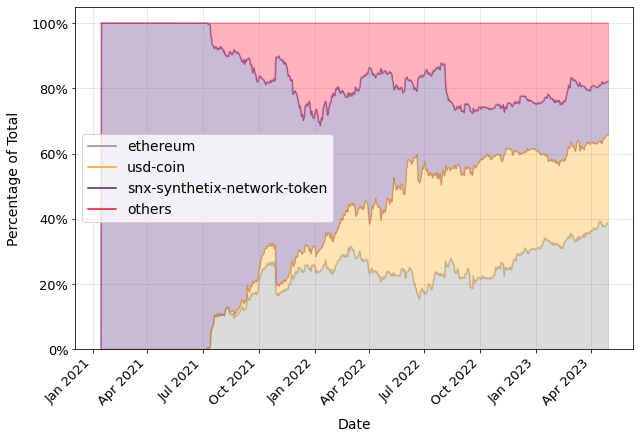

In [35]:
# Define function to format y-axis as percentages
def percent_formatter(x, pos):
    return f'{x:.0%}'

# Calculate cumulative sum of the value_usd column
balances_over_time = optimism.groupby(['date', 'token_name'])['balance_usd'].sum().unstack()

# Find the last date in the DataFrame
last_date = balances_over_time.index[-1]

# Sort the DataFrame by the values at the last date
sorted_balances = balances_over_time.loc[last_date].sort_values(ascending=False)

# Select the top 3 token names based on the sorting
top_3_tokens = sorted_balances.index[:3]

# Calculate the percentage contribution of each token to the total balance at each date
percentage_balances = balances_over_time.div(balances_over_time.sum(axis=1), axis=0)

# Calculate the "others" category without allowing negative values
others = 1 - percentage_balances[top_3_tokens].sum(axis=1)
percentage_balances['others'] = others.clip(lower=0)  # Clip negative values to zero

# Replace NaN values with 0
percentage_balances = percentage_balances.fillna(0)

# Create a time series plot
fig, ax = plt.subplots(figsize=(10, 7))

# Define custom colors for each category
colors = ['#888888', 'orange', '#4D1D7A', '#FF0320']  # Add more colors as needed

# Plot the percentage contribution of the top 3 token balances along with "others"
# Use the proper column selection for top 3 tokens and "others," and specify colors
selected_columns = top_3_tokens.tolist() + ['others']
area_plot = percentage_balances[selected_columns].plot(ax=ax, kind='area', alpha=0.3, colormap='Set3', color=colors)

# Set x-axis label, format, and font size
ax.set_xlabel('Date', fontsize=14, labelpad=10)
date_format = mdates.DateFormatter("%b %Y")  # This format displays first three letters of the month and year
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=13)  # setting x-ticks font size
plt.xticks(rotation=45)

# Set y-axis label, format, and font size
ax.set_ylabel('Percentage of Total', fontsize=14, labelpad=10)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(percent_formatter))
ax.tick_params(axis='y', labelsize=13)  # setting y-ticks font size

# Call grid here before plotting lines and fills
ax.grid(True, linestyle='--', color='gray', linewidth=0.5, alpha=0.5, which='both', axis='both')

# Add a legend with higher opacity
legend = ax.legend(fontsize=14, labels=selected_columns)
for lh in legend.legendHandles:
    lh.set_alpha(1)  # Set legend items to full opacity

#plt.savefig('figures/token-distribution-optimism.png', facecolor='w',dpi=150, bbox_inches='tight')   

# Show the plot
plt.show()


In [14]:
# Find the last day recorded in the DataFrame
last_day = optimism['date'].max()

# Filter the DataFrame to include only rows for the last day
last_day_data = optimism[optimism['date'] == last_day]

# Group by token_address and sum the balance_usd for each token
token_balances = last_day_data.groupby('token_address').agg({
    'date': 'first',  # Get the date of the first occurrence
    'token_name': 'first',  # Get the token_name of the first occurrence
    'balance_usd': 'sum'  # Sum the balance_usd
}).reset_index()

# Get the top 3 tokens based on their aggregated balance_usd
top_tokens = token_balances.nlargest(3, 'balance_usd')

# Set the display format for float columns
pd.options.display.float_format = '{:.2f}'.format

# Print the top 3 token addresses, along with date, token_name, and balance_usd
(top_tokens[['date', 'token_address', 'token_name', 'balance_usd']])


,date,token_address,token_name,balance_usd
38,2023-04-29,ether,ethereum,559488867.17
23,2023-04-29,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,usd-coin,394211677.03
25,2023-04-29,0xC011a73ee8576Fb46F5E1c5751cA3B9Fe0af2a6F,snx-synthetix-network-token,239312282.27


In [21]:
# Convert the 'timestamp' column to datetime if it's not already in datetime format
optimism['timestamp'] = pd.to_datetime(optimism['timestamp'])

# Filter the DataFrame for rows where 'project' is equal to 'optimism'
optimism_df = optimism[optimism['project'] == 'optimism']

# Filter the DataFrame for the last day's data within the 'optimism' project
last_day_optimism_df = optimism_df[optimism_df['timestamp'] == optimism_df['timestamp'].max()]

# Group by 'token_name' and sum 'balance_usd' for each token
token_balances = last_day_optimism_df.groupby('token_name')['balance_usd'].sum().reset_index()

# Sort the groups by the sum of 'balance_usd' in descending order
sorted_tokens = token_balances.sort_values(by='balance_usd', ascending=False)

# Select the top 3 tokens
top_3_tokens = sorted_tokens.head(3)

# Calculate the sum of 'balance_usd' for all tokens except the top 3
other_balance = sorted_tokens.iloc[3:]['balance_usd'].sum()

# Create a DataFrame for the "other" row
other_row = pd.DataFrame([['other', other_balance]], columns=['token_name', 'balance_usd'])

# Concatenate the "other" row with the top 3 tokens
final_result = pd.concat([top_3_tokens, other_row])

# Set the float format to not use scientific notation
pd.options.display.float_format = '{:,.2f}'.format

# Print the result
print(final_result)


                     token_name    balance_usd
13                     ethereum 559,488,867.17
35                     usd-coin 394,211,677.03
27  snx-synthetix-network-token 239,312,282.27
0                         other 259,510,487.78


/opt/conda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:226: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/style.py:27: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


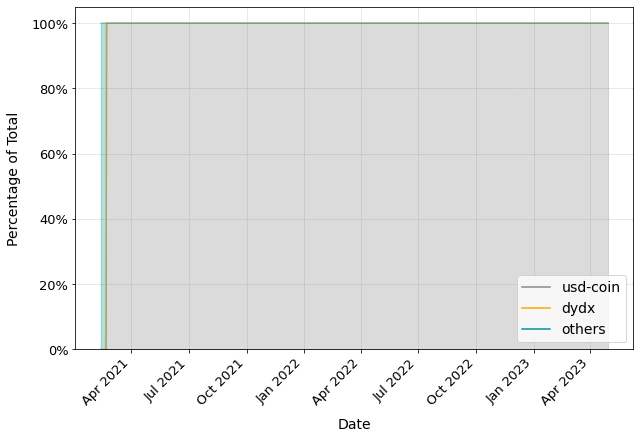

In [15]:
# Define function to format y-axis as percentages
def percent_formatter(x, pos):
    return f'{x:.0%}'

# Calculate cumulative sum of the value_usd column
balances_over_time = dydx.groupby(['date', 'token_name'])['balance_usd'].sum().unstack()

# Find the last date in the DataFrame
last_date = balances_over_time.index[-1]

# Sort the DataFrame by the values at the last date
sorted_balances = balances_over_time.loc[last_date].sort_values(ascending=False)

# Select the top 3 token names based on the sorting
top_3_tokens = sorted_balances.index[:3]

# Calculate the percentage contribution of each token to the total balance at each date
percentage_balances = balances_over_time.div(balances_over_time.sum(axis=1), axis=0)

# Calculate the "others" category without allowing negative values
others = 1 - percentage_balances[top_3_tokens].sum(axis=1)
percentage_balances['others'] = others.clip(lower=0)  # Clip negative values to zero

# Replace NaN values with 0
percentage_balances = percentage_balances.fillna(0)

# Create a time series plot
fig, ax = plt.subplots(figsize=(10, 7))

# Define custom colors for each category
colors = ['#888888', 'orange', '#009393', '#28A0F0']  # Add more colors as needed

# Plot the percentage contribution of the top 3 token balances along with "others"
# Use the proper column selection for top 3 tokens and "others," and specify colors
selected_columns = top_3_tokens.tolist() + ['others']
area_plot = percentage_balances[selected_columns].plot(ax=ax, kind='area', alpha=0.3, colormap='Set3', color=colors)

# Set x-axis label, format, and font size
ax.set_xlabel('Date', fontsize=14, labelpad=10)
date_format = mdates.DateFormatter("%b %Y")  # This format displays first three letters of the month and year
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=13)  # setting x-ticks font size
plt.xticks(rotation=45)

# Set y-axis label, format, and font size
ax.set_ylabel('Percentage of Total', fontsize=14, labelpad=10)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(percent_formatter))
ax.tick_params(axis='y', labelsize=13)  # setting y-ticks font size

# Call grid here before plotting lines and fills
ax.grid(True, linestyle='--', color='gray', linewidth=0.5, alpha=0.5, which='both', axis='both')

# Add a legend with higher opacity
legend = ax.legend(fontsize=14, labels=selected_columns)
for lh in legend.legendHandles:
    lh.set_alpha(1)  # Set legend items to full opacity

#plt.savefig('figures/token-distribution-dydx.png', facecolor='w',dpi=150, bbox_inches='tight')  

# Show the plot
plt.show()


In [16]:

# Find the last day recorded in the DataFrame
last_day = dydx['date'].max()

# Filter the DataFrame to include only rows for the last day
last_day_data = dydx[dydx['date'] == last_day]

# Group by token_address and sum the balance_usd for each token
token_balances = last_day_data.groupby('token_address').agg({
    'date': 'first',  # Get the date of the first occurrence
    'token_name': 'first',  # Get the token_name of the first occurrence
    'balance_usd': 'sum'  # Sum the balance_usd
}).reset_index()

# Get the top 3 tokens based on their aggregated balance_usd
top_tokens = token_balances.nlargest(3, 'balance_usd')

# Set the display format for float columns
pd.options.display.float_format = '{:.2f}'.format

# Print the top 3 token addresses, along with date, token_name, and balance_usd
(top_tokens[['date', 'token_address', 'token_name', 'balance_usd']])


,date,token_address,token_name,balance_usd
1,2023-04-29,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,usd-coin,336682951.86
0,2023-04-29,0x92D6C1e31e14520e676a687F0a93788B716BEff5,dydx,399.85


/opt/conda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:226: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/style.py:27: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


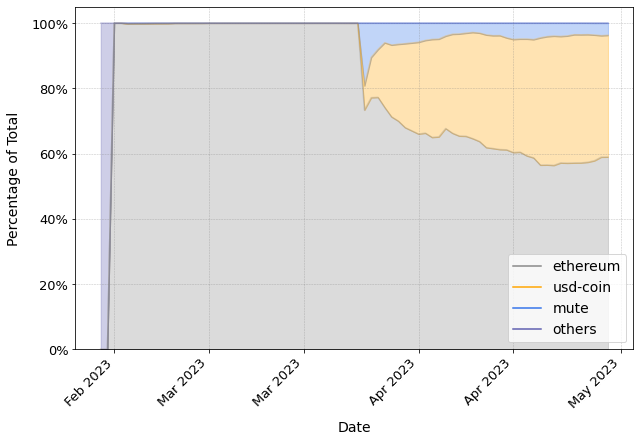

In [36]:
# Define function to format y-axis as percentages
def percent_formatter(x, pos):
    return f'{x:.0%}'

# Calculate cumulative sum of the value_usd column
balances_over_time = zksync.groupby(['date', 'token_name'])['balance_usd'].sum().unstack()

# Find the last date in the DataFrame
last_date = balances_over_time.index[-1]

# Sort the DataFrame by the values at the last date
sorted_balances = balances_over_time.loc[last_date].sort_values(ascending=False)

# Select the top 3 token names based on the sorting
top_3_tokens = sorted_balances.index[:3]

# Calculate the percentage contribution of each token to the total balance at each date
percentage_balances = balances_over_time.div(balances_over_time.sum(axis=1), axis=0)

# Calculate the "others" category without allowing negative values
others = 1 - percentage_balances[top_3_tokens].sum(axis=1)
percentage_balances['others'] = others.clip(lower=0)  # Clip negative values to zero

# Replace NaN values with 0
percentage_balances = percentage_balances.fillna(0)

# Create a time series plot
fig, ax = plt.subplots(figsize=(10, 7))

# Define custom colors for each category
colors = ['#888888', 'orange', '#3474EB', '#5F5FB0']  # Add more colors as needed

# Plot the percentage contribution of the top 3 token balances along with "others"
# Use the proper column selection for top 3 tokens and "others," and specify colors
selected_columns = top_3_tokens.tolist() + ['others']
area_plot = percentage_balances[selected_columns].plot(ax=ax, kind='area', alpha=0.3, colormap='Set3', color=colors)

# Set x-axis label, format, and font size
ax.set_xlabel('Date', fontsize=14, labelpad=10)
date_format = mdates.DateFormatter("%b %Y")  # This format displays first three letters of the month and year
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=13)  # setting x-ticks font size
plt.xticks(rotation=45)

# Set y-axis label, format, and font size
ax.set_ylabel('Percentage of Total', fontsize=14, labelpad=10)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(percent_formatter))
ax.tick_params(axis='y', labelsize=13)  # setting y-ticks font size

# Call grid here before plotting lines and fills
ax.grid(True, linestyle='--', color='gray', linewidth=0.5, alpha=0.5, which='both', axis='both')

# Add a legend with higher opacity
legend = ax.legend(fontsize=14, labels=selected_columns)
for lh in legend.legendHandles:
    lh.set_alpha(1)  # Set legend items to full opacity

#plt.savefig('figures/token-distribution-zksync.png', facecolor='w',dpi=150, bbox_inches='tight')    
    
# Show the plot
plt.show()


In [18]:

# Find the last day recorded in the DataFrame
last_day = zksync['date'].max()

# Filter the DataFrame to include only rows for the last day
last_day_data = zksync[zksync['date'] == last_day]

# Group by token_address and sum the balance_usd for each token
token_balances = last_day_data.groupby('token_address').agg({
    'date': 'first',  # Get the date of the first occurrence
    'token_name': 'first',  # Get the token_name of the first occurrence
    'balance_usd': 'sum'  # Sum the balance_usd
}).reset_index()

# Get the top 3 tokens based on their aggregated balance_usd
top_tokens = token_balances.nlargest(3, 'balance_usd')

# Set the display format for float columns
pd.options.display.float_format = '{:.2f}'.format

# Print the top 3 token addresses, along with date, token_name, and balance_usd
(top_tokens[['date', 'token_address', 'token_name', 'balance_usd']])


,date,token_address,token_name,balance_usd
17,2023-04-29,ether,ethereum,154385893.16
8,2023-04-29,0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48,usd-coin,97560616.90
9,2023-04-29,0xA49d7499271aE71cd8aB9Ac515e6694C755d400c,mute,9821278.69


# TVL across escrows

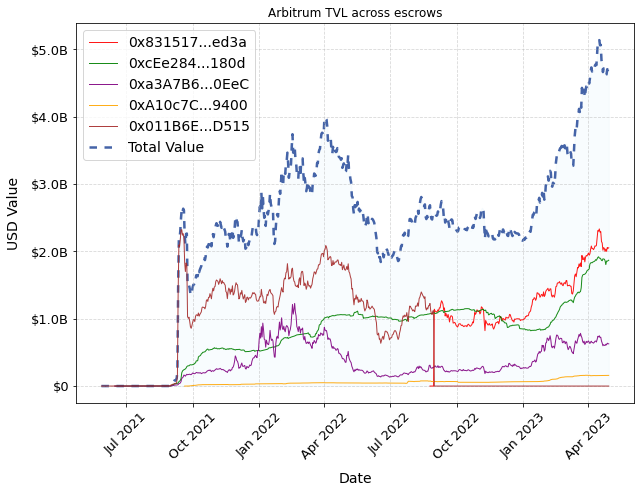

In [130]:
# Define function to format y-axis as dollar values with abbreviation
def dollar_formatter(x, pos):
    if x >= 1e9:
        return f'${x/1e9:.1f}B'
    elif x >= 1e6:
        return f'${x/1e6:.1f}M'
    elif x >= 1e3:
        return f'${x/1e3:.1f}K'
    else:
        return f'${x:.0f}'

# Calculate cumulative sum of the value_usd column
balances_over_time = arbitrum.groupby(['date', 'escrow_address_abbr'])['balance_usd'].sum().unstack()

# Calculate total value over time
total_value = balances_over_time.sum(axis=1)

# Calculate total balance_usd at the end of the period for each escrow address
end_of_period_balances = balances_over_time.iloc[-1]

# Sort escrow addresses based on total balance_usd at the end of the period
sorted_escrow_addresses = end_of_period_balances.sort_values(ascending=False).index

# Add 'Total Value' to the sorted_escrow_addresses list temporarily
sorted_escrow_addresses = list(sorted_escrow_addresses) + ['Total Value']

# Create a time series plot
fig, ax = plt.subplots(figsize=(10, 7))
# Define a list of line colors for individual lines
line_colors = ['red', 'green', 'purple', 'orange', 'brown']  # Add more colors as needed

# Plot individual lines with higher z-order (e.g., 2) to make them appear on top
for idx, column in enumerate(sorted_escrow_addresses[:-1]):  # Exclude 'Total Value' from the loop
    ax.plot(balances_over_time.index, balances_over_time[column], color=line_colors[idx], linewidth=1, markersize=0.5, alpha=0.9, label=column, zorder=2)  # Increased linewidth to 1.5

# Plot total value line as solid with a lower z-order (e.g., 1)
ax.plot(total_value.index, total_value, label='Total Value', zorder=0,  linewidth=2.5, linestyle="dotted", dashes=[3, 3], color="#4564A8")

# Use fill_between with a lower z-order (e.g., 0) to ensure it's at the very bottom
ax.fill_between(total_value.index, 0, total_value, color='#28A0F0', alpha=0.03, zorder=0)

# Set x-axis label, format, and font size
ax.set_xlabel('Date', fontsize=14, labelpad=10)
date_format = mdates.DateFormatter("%b %Y")  # This format displays first three letters of the month and year
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=13)  # setting x-ticks font size
plt.xticks(rotation=45)

# Set y-axis label, format, and font size
ax.set_ylabel('USD Value', fontsize=14, labelpad=10)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(dollar_formatter))
ax.tick_params(axis='y', labelsize=13)  # setting y-ticks font size

# Set plot title
ax.set_title('Arbitrum TVL across escrows')

# Add grid
ax.grid(True, alpha=0.5, linestyle='--')

# Create the legend
legend = ax.legend(fontsize=14)

# Remove 'Total Value' from the legend labels
legend.get_lines()[-1].set_label('')  # Remove 'Total Value' label from the legend

#plt.savefig('figures/escrow-allocation-arbitrum.png', facecolor='w',dpi=150, bbox_inches='tight')  

# Show plot
plt.show()


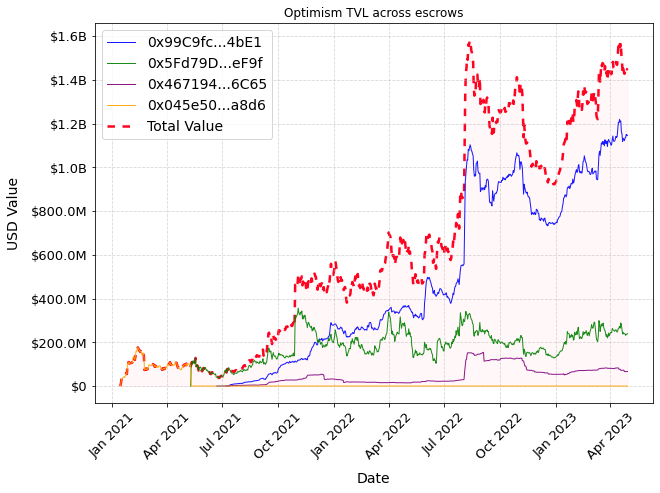

In [129]:
# Define function to format y-axis as dollar values with abbreviation
def dollar_formatter(x, pos):
    if x >= 1e9:
        return f'${x/1e9:.1f}B'
    elif x >= 1e6:
        return f'${x/1e6:.1f}M'
    elif x >= 1e3:
        return f'${x/1e3:.1f}K'
    else:
        return f'${x:.0f}'

# Calculate cumulative sum of the value_usd column
balances_over_time = optimism.groupby(['date', 'escrow_address_abbr'])['balance_usd'].sum().unstack()

# Calculate total value over time
total_value = balances_over_time.sum(axis=1)

# Calculate total balance_usd at the end of the period for each escrow address
end_of_period_balances = balances_over_time.iloc[-1]

# Sort escrow addresses based on total balance_usd at the end of the period
sorted_escrow_addresses = end_of_period_balances.sort_values(ascending=False).index

# Add 'Total Value' to the sorted_escrow_addresses list temporarily
sorted_escrow_addresses = list(sorted_escrow_addresses) + ['Total Value']

# Create a time series plot
fig, ax = plt.subplots(figsize=(10, 7))
# Define a list of line colors for individual lines
line_colors = ['blue', 'green', 'purple', 'orange', 'brown']  # Add more colors as needed

# Plot individual lines with higher z-order (e.g., 2) to make them appear on top
for idx, column in enumerate(sorted_escrow_addresses[:-1]):  # Exclude 'Total Value' from the loop
    ax.plot(balances_over_time.index, balances_over_time[column], color=line_colors[idx], linewidth=1, markersize=0.5, alpha=0.9, label=column, zorder=2)  # Increased linewidth to 1.5

# Plot total value line as solid with a lower z-order (e.g., 1)
ax.plot(total_value.index, total_value, label='Total Value', zorder=0,  linewidth=2.5, linestyle="dotted", dashes=[3, 3], color="#FF0320")

# Use fill_between with a lower z-order (e.g., 0) to ensure it's at the very bottom
ax.fill_between(total_value.index, 0, total_value, color='#FF0320', alpha=0.03, zorder=0)

# Set x-axis label, format, and font size
ax.set_xlabel('Date', fontsize=14, labelpad=10)
date_format = mdates.DateFormatter("%b %Y")  # This format displays first three letters of the month and year
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=13)  # setting x-ticks font size
plt.xticks(rotation=45)

# Set y-axis label, format, and font size
ax.set_ylabel('USD Value', fontsize=14, labelpad=10)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(dollar_formatter))
ax.tick_params(axis='y', labelsize=13)  # setting y-ticks font size

# Set plot title
ax.set_title('Optimism TVL across escrows')

# Add grid
ax.grid(True, alpha=0.5, linestyle='--')

# Create the legend
legend = ax.legend(fontsize=14)

# Remove 'Total Value' from the legend labels
legend.get_lines()[-1].set_label('')  # Remove 'Total Value' label from the legend

#plt.savefig('figures/escrow-allocation-optimism.png', facecolor='w',dpi=150, bbox_inches='tight')  

# Show plot
plt.show()


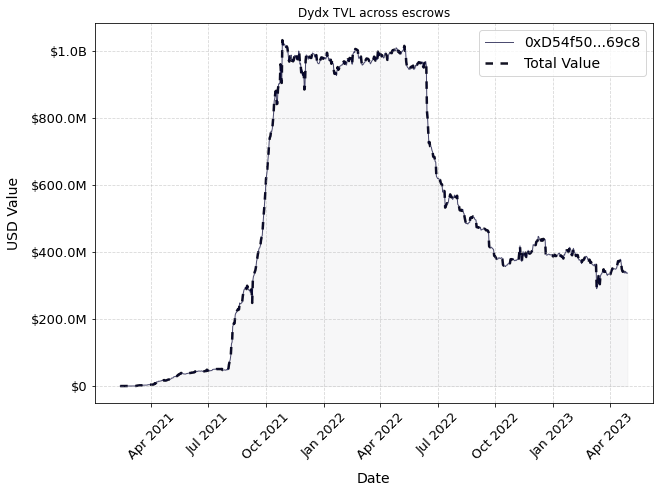

In [131]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

# Define function to format y-axis as dollar values with abbreviation
def dollar_formatter(x, pos):
    if x >= 1e9:
        return f'${x/1e9:.1f}B'
    elif x >= 1e6:
        return f'${x/1e6:.1f}M'
    elif x >= 1e3:
        return f'${x/1e3:.1f}K'
    else:
        return f'${x:.0f}'

# Calculate cumulative sum of the value_usd column
balances_over_time = dydx.groupby(['date', 'escrow_address_abbr'])['balance_usd'].sum().unstack()

# Calculate total value over time
total_value = balances_over_time.sum(axis=1)

# Calculate total balance_usd at the end of the period for each escrow address
end_of_period_balances = balances_over_time.iloc[-1]

# Sort escrow addresses based on total balance_usd at the end of the period
sorted_escrow_addresses = end_of_period_balances.sort_values(ascending=False).index

# Add 'Total Value' to the sorted_escrow_addresses list temporarily
sorted_escrow_addresses = list(sorted_escrow_addresses) + ['Total Value']

# Create a time series plot
fig, ax = plt.subplots(figsize=(10, 7))
# Define a list of line colors for individual lines
line_colors = [(0, 0, 0.2, 0.5), (0, 0.6, 0, 0.7), (0.5, 0, 0.5, 0.7), (1, 0.5, 0, 0.7), (1, 0, 1, 0.7)]   # Add more colors as needed

# Plot individual lines with higher z-order (e.g., 2) to make them appear on top
for idx, column in enumerate(sorted_escrow_addresses[:-1]):  # Exclude 'Total Value' from the loop
    ax.plot(balances_over_time.index, balances_over_time[column], color=line_colors[idx], linewidth=1, markersize=0.5, alpha=0.7, label=column, zorder=2)  # Increased linewidth to 1.5

# Plot total value line as solid with a lower z-order (e.g., 1)
ax.plot(total_value.index, total_value, label='Total Value', zorder=0,  linewidth=2.5, linestyle="dotted", dashes=[3, 3], color="#131323")

# Use fill_between with a lower z-order (e.g., 0) to ensure it's at the very bottom
ax.fill_between(total_value.index, 0, total_value, color='#131323', alpha=0.03, zorder=0)

# Set x-axis label, format, and font size
ax.set_xlabel('Date', fontsize=14, labelpad=10)
date_format = mdates.DateFormatter("%b %Y")  # This format displays first three letters of the month and year
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=13)  # setting x-ticks font size
plt.xticks(rotation=45)

# Set y-axis label, format, and font size
ax.set_ylabel('USD Value', fontsize=14, labelpad=10)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(dollar_formatter))
ax.tick_params(axis='y', labelsize=13)  # setting y-ticks font size

# Set plot title
ax.set_title('Dydx TVL across escrows')

# Add grid
ax.grid(True, alpha=0.5, linestyle='--')

# Create the legend
legend = ax.legend(fontsize=14)

# Remove 'Total Value' from the legend labels
legend.get_lines()[-1].set_label('')  # Remove 'Total Value' label from the legend

#plt.savefig('figures/escrow-allocation-dydx.png', facecolor='w',dpi=150, bbox_inches='tight')  

# Show plot
plt.show()


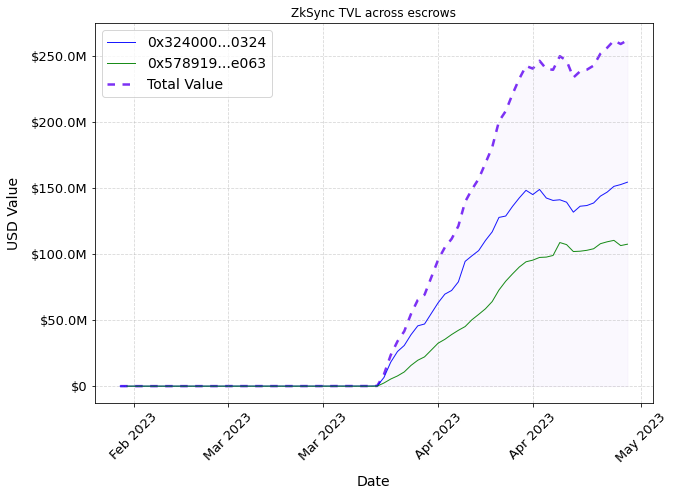

In [132]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

# Define function to format y-axis as dollar values with abbreviation
def dollar_formatter(x, pos):
    if x >= 1e9:
        return f'${x/1e9:.1f}B'
    elif x >= 1e6:
        return f'${x/1e6:.1f}M'
    elif x >= 1e3:
        return f'${x/1e3:.1f}K'
    else:
        return f'${x:.0f}'

# Calculate cumulative sum of the value_usd column
balances_over_time = zksync.groupby(['date', 'escrow_address_abbr'])['balance_usd'].sum().unstack()

# Calculate total value over time
total_value = balances_over_time.sum(axis=1)

# Calculate total balance_usd at the end of the period for each escrow address
end_of_period_balances = balances_over_time.iloc[-1]

# Sort escrow addresses based on total balance_usd at the end of the period
sorted_escrow_addresses = end_of_period_balances.sort_values(ascending=False).index

# Add 'Total Value' to the sorted_escrow_addresses list temporarily
sorted_escrow_addresses = list(sorted_escrow_addresses) + ['Total Value']

# Create a time series plot
fig, ax = plt.subplots(figsize=(10, 7))
# Define a list of line colors for individual lines
line_colors = ['blue', 'green', 'purple', 'orange', 'brown']  # Add more colors as needed

# Plot individual lines with higher z-order (e.g., 2) to make them appear on top
for idx, column in enumerate(sorted_escrow_addresses[:-1]):  # Exclude 'Total Value' from the loop
    ax.plot(balances_over_time.index, balances_over_time[column], color=line_colors[idx], linewidth=1, markersize=0.5, alpha=0.9, label=column, zorder=2)  # Increased linewidth to 1.5

# Plot total value line as solid with a lower z-order (e.g., 1)
ax.plot(total_value.index, total_value, label='Total Value', zorder=0,  linewidth=2.5, linestyle="dotted", dashes=[3, 3], color="#7C31F4")

# Use fill_between with a lower z-order (e.g., 0) to ensure it's at the very bottom
ax.fill_between(total_value.index, 0, total_value, color='#7C31F4', alpha=0.03, zorder=0)

# Set x-axis label, format, and font size
ax.set_xlabel('Date', fontsize=14, labelpad=10)
date_format = mdates.DateFormatter("%b %Y")  # This format displays first three letters of the month and year
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=13)  # setting x-ticks font size
plt.xticks(rotation=45)

# Set y-axis label, format, and font size
ax.set_ylabel('USD Value', fontsize=14, labelpad=10)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(dollar_formatter))
ax.tick_params(axis='y', labelsize=13)  # setting y-ticks font size

# Set plot title
ax.set_title('ZkSync TVL across escrows')

# Add grid
ax.grid(True, alpha=0.5, linestyle='--')

# Create the legend
legend = ax.legend(fontsize=14)

# Remove 'Total Value' from the legend labels
legend.get_lines()[-1].set_label('')  # Remove 'Total Value' label from the legend

#plt.savefig('figures/escrow-allocation-zksync.png', facecolor='w',dpi=150, bbox_inches='tight')  

# Show plot
plt.show()


# Transaction Count

data for the transaction count was retreived from DuneAnalytics with the following Query

WITH
ArbTx AS (
  SELECT
    DATE_TRUNC('day', block_time) AS datestamp,
    COUNT(*) AS arbitrum_daily_tx_count
  FROM arbitrum.transactions
  WHERE "to" NOT IN (
    SELECT address FROM labels.system_addresses WHERE blockchain = 'arbitrum'
  )
  GROUP BY DATE_TRUNC('day', block_time)
),

OptTx AS (
  SELECT
    DATE_TRUNC('day', block_time) AS datestamp,
    COUNT(*) AS optimism_daily_tx_count
  FROM optimism.transactions
  WHERE "to" NOT IN (
    SELECT address FROM labels.system_addresses WHERE blockchain = 'optimism'
  )
  GROUP BY DATE_TRUNC('day', block_time)
),

EthTx AS (
  SELECT
    DATE_TRUNC('day', block_time) AS datestamp,
    COUNT(*) AS ethereum_daily_tx_count
  FROM ethereum.transactions
  LEFT JOIN ethereum.blocks ON ethereum.transactions.block_number = ethereum.blocks.number
  GROUP BY DATE_TRUNC('day', block_time)
)

SELECT
  arb.datestamp,
  arb.arbitrum_daily_tx_count,
  opt.optimism_daily_tx_count,
  eth.ethereum_daily_tx_count
FROM ArbTx AS arb
LEFT JOIN OptTx AS opt ON arb.datestamp = opt.datestamp
LEFT JOIN EthTx AS eth ON arb.datestamp = eth.datestamp
WHERE arb.datestamp < CURRENT_DATE
ORDER BY arb.datestamp DESC;


In [22]:
tx_count = pd.read_csv('data/tx_count_eth-arb-op_dune.csv')

tx_count = tx_count[tx_count['datestamp'] < '2023-04-30']
tx_count['datestamp'] = pd.to_datetime(tx_count['datestamp'])
tx_count['datestamp'] = tx_count['datestamp'].dt.strftime('%Y-%m-%d')
tx_count['datestamp'] = pd.to_datetime(tx_count['datestamp'])


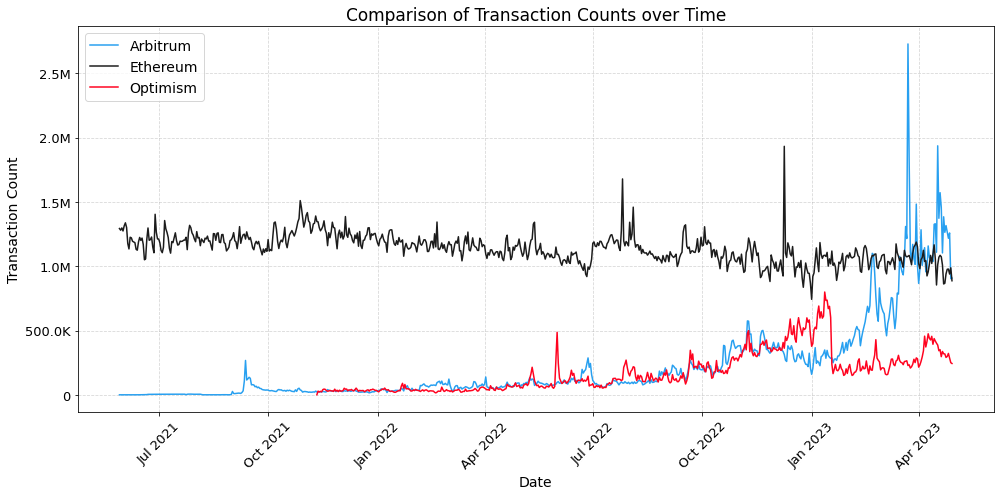

In [7]:
# Define function to format y-axis values with abbreviation
def number_formatter(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    elif x >= 1e3:
        return f'{x/1e3:.1f}K'
    else:
        return f'{x:.0f}'

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(14,7))

# Plot the data
plt.plot(tx_count['datestamp'], tx_count['arbitrum_daily_tx_count'], label='Arbitrum', color='#28A0F0')
plt.plot(tx_count['datestamp'], tx_count['ethereum_daily_tx_count'], label='Ethereum', color='#1C1C1C')
plt.plot(tx_count['datestamp'], tx_count['optimism_daily_tx_count'], label='Optimism', color='#FF0320')

# Add grid
ax.grid(True, alpha=0.5, linestyle='--')

# Set x-axis label, format and font size
ax.set_xlabel('Date', fontsize=14)

# Use DateFormatter to format x-axis dates
date_format = mdates.DateFormatter("%b %Y")  # This format displays first three letters of the month and year
ax.xaxis.set_major_formatter(date_format)

ax.tick_params(axis='x', labelsize=13)  # setting x-ticks font size
plt.xticks(rotation=45)

# Set y-axis label, format and font size
ax.set_ylabel('Transaction Count', fontsize=14)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(number_formatter))
ax.tick_params(axis='y', labelsize=13)  # setting y-ticks font size

# Set plot title with smaller font size
ax.set_title('Comparison of Transaction Counts over Time', fontsize=17)

# Display legend with smaller font size
ax.legend(fontsize=14)

#plt.savefig('figures/tx_count_comparison.png', facecolor='w',dpi=200, bbox_inches='tight')

# Display the plot
plt.tight_layout()
plt.show()


In [21]:
# Create a new DataFrame df_arbitrum_daily
df_arbitrum_daily = tx_count[['datestamp', 'arbitrum_daily_tx_count']].copy()
df_arbitrum_daily.rename(columns={'datestamp': 'date'}, inplace=True)

df_optimism_daily = tx_count[['datestamp', 'optimism_daily_tx_count']].copy()
df_optimism_daily.rename(columns={'datestamp': 'date'}, inplace=True)

df_ethereum_daily = tx_count[['datestamp', 'ethereum_daily_tx_count']].copy()
df_ethereum_daily.rename(columns={'datestamp': 'date'}, inplace=True)

# Merge the two DataFrames on the 'date' column
merged_df = df_arbitrum_daily.merge(df_ethereum_daily, on='date', suffixes=('_arbitrum', '_ethereum'))

# Find the first row where df_arbitrum_daily overtakes df_ethereum_daily
first_overtake_date = merged_df[merged_df['arbitrum_daily_tx_count'] >= merged_df['ethereum_daily_tx_count']]['date'].min()

print("The first date where df_arbitrum_daily overtakes df_ethereum_daily is:", first_overtake_date)


In [20]:

# Merge the two DataFrames on the 'date' column
merged_df = df_arbitrum_daily.merge(df_ethereum_daily, on='date', suffixes=('_arbitrum', '_ethereum'))

# Find the first row where df_arbitrum_daily overtakes df_ethereum_daily
first_overtake_date = merged_df[merged_df['arbitrum_daily_tx_count'] >= merged_df['ethereum_daily_tx_count']]['date'].min()

print("The first date where df_arbitrum_daily overtakes df_ethereum_daily is:", first_overtake_date)

The first date where df_arbitrum_daily overtakes df_ethereum_daily is: 2023-02-21 00:00:00


In [22]:
# 1. Identify the date with the maximum arbitrum_daily_tx_count
max_arbitrum_date = merged_df['date'][merged_df['arbitrum_daily_tx_count'].idxmax()]

# 2. Filter the DataFrame merged_df to get the transaction counts for both chains on that date
max_arbitrum_tx = merged_df[merged_df['date'] == max_arbitrum_date]['arbitrum_daily_tx_count'].values[0]
max_ethereum_tx = merged_df[merged_df['date'] == max_arbitrum_date]['ethereum_daily_tx_count'].values[0]

print(f"On {max_arbitrum_date}, Arbitrum had {max_arbitrum_tx} transactions while Ethereum had {max_ethereum_tx} transactions.")


On 2023-03-23 00:00:00, Arbitrum had 2728907.0 transactions while Ethereum had 1077305.0 transactions.


# TPS
data for the TPS  was retreived from DuneAnalytics with the following Query

WITH
ArbTx AS (
  SELECT
    DATE_TRUNC('hour', block_time) AS time,
    COUNT(*)/3600.0 AS tps
  FROM arbitrum.transactions
  WHERE block_time < DATE_TRUNC('day', CURRENT_DATE)
  GROUP BY 1
),

OptTx AS (
  SELECT
    DATE_TRUNC('hour', block_time) AS time,
    COUNT(*)/3600.0 AS tps
  FROM optimism.transactions
  WHERE block_time < DATE_TRUNC('day', CURRENT_DATE)
  GROUP BY 1
),

EthTx AS (
  SELECT
    DATE_TRUNC('hour', block_time) AS time,
    COUNT(*)/3600.0 AS tps
  FROM ethereum.transactions
  WHERE block_time < DATE_TRUNC('day', CURRENT_DATE)
  GROUP BY 1
)

SELECT
  COALESCE(arb.time, opt.time, eth.time) AS time,
  COALESCE(arb.tps, 0) AS arbitrum_tps,
  COALESCE(opt.tps, 0) AS optimism_tps,
  COALESCE(eth.tps, 0) AS ethereum_tps
FROM ArbTx AS arb
FULL OUTER JOIN OptTx AS opt ON arb.time = opt.time
FULL OUTER JOIN EthTx AS eth ON arb.time = eth.time
ORDER BY time DESC;


In [23]:
tps_history = pd.read_csv('data/tps_eth-arb-op_dune.csv')
tps_history['time'] = pd.to_datetime(tps_history['time'])

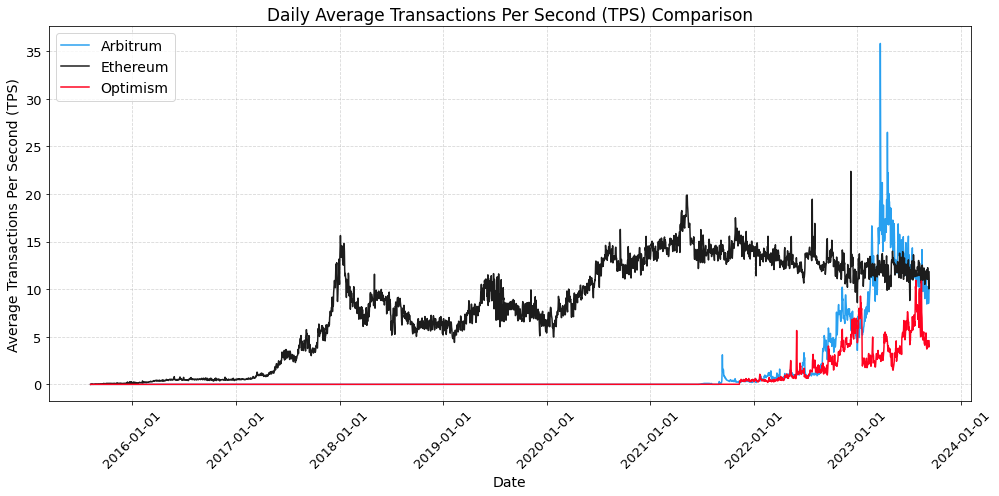

In [4]:
# Load your tps_history DataFrame here
# tps_history = pd.read_csv('your_data.csv')

# Convert the 'time' column to datetime
tps_history['time'] = pd.to_datetime(tps_history['time'])

# Group by day and calculate the daily mean TPS
daily_tps = tps_history.groupby(tps_history['time'].dt.date).mean()

# Define function to format y-axis values with abbreviation
def number_formatter(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    elif x >= 1e3:
        return f'{x/1e3:.1f}K'
    else:
        return f'{x:.0f}'

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the daily average TPS
plt.plot(daily_tps.index, daily_tps['arbitrum_tps'], label='Arbitrum', color='#28A0F0')
plt.plot(daily_tps.index, daily_tps['ethereum_tps'], label='Ethereum', color='#1C1C1C')
plt.plot(daily_tps.index, daily_tps['optimism_tps'], label='Optimism', color='#FF0320')

# Add grid
ax.grid(True, alpha=0.5, linestyle='--')

# Set x-axis label, format, and font size
ax.set_xlabel('Date', fontsize=14)

# Use DateFormatter to format x-axis dates
date_format = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_format)

ax.tick_params(axis='x', labelsize=13)  # setting x-ticks font size
plt.xticks(rotation=45)

# Set y-axis label, format, and font size
ax.set_ylabel('Average Transactions Per Second (TPS)', fontsize=14)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(number_formatter))
ax.tick_params(axis='y', labelsize=13)  # setting y-ticks font size

# Set plot title with smaller font size
ax.set_title('Daily Average Transactions Per Second (TPS) Comparison', fontsize=17)

# Display legend with smaller font size
ax.legend(fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd

# Assuming daily_tps contains the daily TPS data as calculated in your code

# Filter the DataFrame to include data from 01-01-2023 onwards
start_date = pd.to_datetime("2023-01-01")
filtered_daily_tps = daily_tps[daily_tps.index >= start_date]

# Calculate the average TPS for each project
avg_arbitrum_tps = filtered_daily_tps['arbitrum_tps'].mean()
avg_ethereum_tps = filtered_daily_tps['ethereum_tps'].mean()
avg_optimism_tps = filtered_daily_tps['optimism_tps'].mean()

# Create a DataFrame with the average TPS for each project
avg_tps_df = pd.DataFrame({
    'Project': ['Arbitrum', 'Ethereum', 'Optimism'],
    'Average_TPS': [avg_arbitrum_tps, avg_ethereum_tps, avg_optimism_tps]
})

# Display the average TPS DataFrame
print(avg_tps_df)


    Project  Average_TPS
0  Arbitrum    12.360892
1  Ethereum    12.049705
2  Optimism     4.466962


# Daily Active Addresses
data for the Daily Active Addresses was retreived from DuneAnalytics with the following Query

WITH
ArbUsers AS (
    SELECT
        DATE_TRUNC('day', block_time) AS datestamp,
        COUNT(DISTINCT "from") AS arbitrum_daily_user_count
    FROM arbitrum.transactions
    WHERE "from" NOT IN (
        SELECT address FROM labels.system_addresses WHERE blockchain = 'arbitrum'
    )
    GROUP BY DATE_TRUNC('day', block_time)
),

OptUsers AS (
    SELECT
        DATE_TRUNC('day', block_time) AS datestamp,
        COUNT(DISTINCT "from") AS optimism_daily_user_count
    FROM optimism.transactions
    WHERE "from" NOT IN (
        SELECT address FROM labels.system_addresses WHERE blockchain = 'optimism'
    )
    GROUP BY DATE_TRUNC('day', block_time)
),

EthUsers AS (
    SELECT
        DATE_TRUNC('day', block_time) AS datestamp,
        COUNT(DISTINCT "from") AS ethereum_daily_user_count
    FROM ethereum.transactions
    LEFT JOIN ethereum.blocks ON ethereum.transactions.block_number = ethereum.blocks.number
    GROUP BY DATE_TRUNC('day', block_time)
)

SELECT
    arb.datestamp,
    arb.arbitrum_daily_user_count,
    opt.optimism_daily_user_count,
    eth.ethereum_daily_user_count
FROM ArbUsers AS arb
LEFT JOIN OptUsers AS opt ON arb.datestamp = opt.datestamp
LEFT JOIN EthUsers AS eth ON arb.datestamp = eth.datestamp
WHERE arb.datestamp < CURRENT_DATE
ORDER BY arb.datestamp DESC;


In [ ]:
active_addresses= pd.read_csv('data/active_addresses-eth-arb-op_dune.csv')
active_addresses = active_addresses[active_addresses['datestamp'] <= '2023-04-29']
active_addresses['datestamp'] = pd.to_datetime(active_addresses['datestamp'])
active_addresses['datestamp'] = active_addresses['datestamp'].dt.strftime('%Y-%m-%d')
active_addresses['datestamp'] = pd.to_datetime(active_addresses['datestamp'])


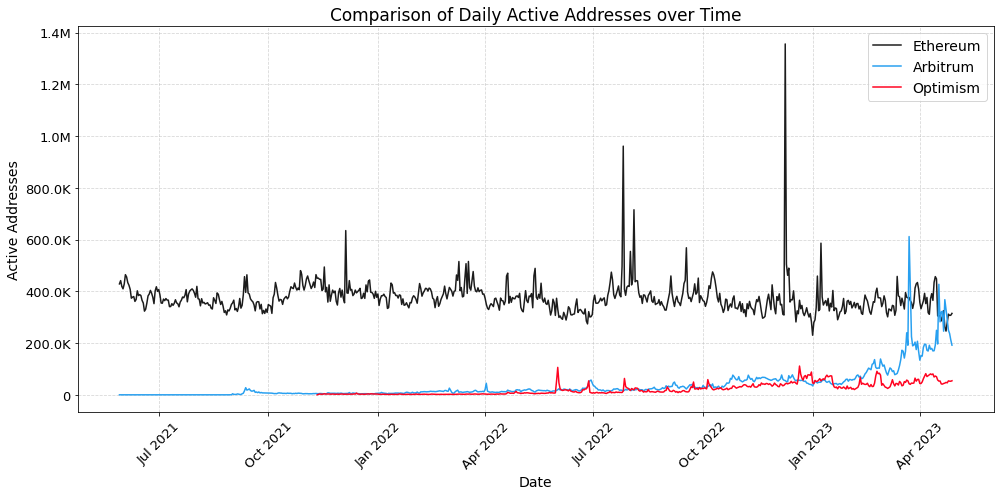

In [25]:
# Define function to format y-axis values with abbreviation
def number_formatter(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    elif x >= 1e3:
        return f'{x/1e3:.1f}K'
    else:
        return f'{x:.0f}'

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(14,7))
 
# Plot the data
plt.plot(active_addresses['datestamp'], active_addresses['ethereum_daily_user_count'], label='Ethereum', color='#1C1C1C')
plt.plot(active_addresses['datestamp'], active_addresses['arbitrum_daily_user_count'], label='Arbitrum', color='#28A0F0')
plt.plot(active_addresses['datestamp'], active_addresses['optimism_daily_user_count'], label='Optimism', color='#FF0320')

# Add grid
ax.grid(True, alpha=0.5, linestyle='--')

# Set x-axis label, format and font size
ax.set_xlabel('Date', fontsize=14)

# Use DateFormatter to format x-axis dates
date_format = mdates.DateFormatter("%b %Y")  
ax.xaxis.set_major_formatter(date_format)

ax.tick_params(axis='x', labelsize=13)  # setting x-ticks font size
plt.xticks(rotation=45)

# Set y-axis label, format and font size
ax.set_ylabel('Active Addresses', fontsize=14)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(number_formatter))
ax.tick_params(axis='y', labelsize=13)  # setting y-ticks font size

# Set plot title with smaller font size
ax.set_title('Comparison of Daily Active Addresses over Time', fontsize=17)

# Display legend with smaller font size
ax.legend(fontsize=14)

# Uncomment the next line if you want to save the plot to a file
#plt.savefig('figures/active_addresses_comparison.png', facecolor='w', dpi=150, bbox_inches='tight')

# Display the plot
plt.tight_layout()
plt.show()


In [26]:
# Filter for March 23, 2023
specific_date_data = active_addresses[active_addresses['datestamp'] == '2023-03-23']

# Extract active addresses for each chain
optimism_addresses = specific_date_data['optimism_daily_user_count'].values[0]
ethereum_addresses = specific_date_data['ethereum_daily_user_count'].values[0]
arbitrum_addresses = specific_date_data['arbitrum_daily_user_count'].values[0]

print(f"On March 23, 2023, the active addresses were:")
print(f"Optimism: {optimism_addresses}")
print(f"Ethereum: {ethereum_addresses}")
print(f"Arbitrum: {arbitrum_addresses}")


On March 23, 2023, the active addresses were:
Optimism: 42811.0
Ethereum: 376249.0
Arbitrum: 611693
